<a href="https://colab.research.google.com/github/BushraShaikh4321/FIRSTDEMO/blob/main/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!pip install matplotlib


In [2]:
!apt-get install unrar



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [3]:
!unrar x Biometrics.rar -d /content/dataset/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Biometrics.rar

Creating    /content/dataset                                          OK
Creating    /content/dataset/biometrics                               OK
Creating    /content/dataset/biometrics/test                          OK
Extracting  /content/dataset/biometrics/test/DSC00165.JPG                  0%  OK 
Extracting  /content/dataset/biometrics/test/DSC00166.JPG                  0%  1%  OK 
Extracting  /content/dataset/biometrics/test/DSC00167.JPG                  1%  2%  OK 
Extracting  /content/dataset/biometrics/test/DSC00168.JPG                  2%  3%  OK 
Extracting  /content/dataset/biometrics/test/DSC00169.JPG                  3%  4%  OK 
Extracting  /content/dataset/biometrics/test/DSC00170.JPG                  4%  5%  OK 
Extracting  /content/dataset/biometrics/test/DSC00171.JPG                  5%

In [4]:
import os

#contents of the extracted folder
extracted_path = '/content/dataset/biometrics'
print(os.listdir(extracted_path))


['training', 'test']


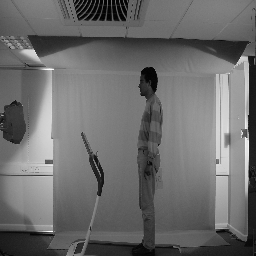

In [5]:
import cv2
import os
import numpy as np

# Defining paths to the training and test folders
train_path = '/content/dataset/biometrics/training'
test_path = '/content/dataset/biometrics/test'


def preprocess_images(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(folder_path, filename)

            # Load image
            image = cv2.imread(img_path)


            image_resized = cv2.resize(image, (256, 256))


            image_normalized = image_resized / 255.0


            image_normalized_uint8 = (image_normalized * 255).astype(np.uint8)

            # Convert to grayscale
            image_gray = cv2.cvtColor(image_normalized_uint8, cv2.COLOR_BGR2GRAY)

            image_list.append(image_gray)

    return image_list

# Preprocess images in training and test folders
train_images = preprocess_images(train_path)
test_images = preprocess_images(test_path)

# Since cv2.imshow() is not supported in Colab, using cv2_imshow instead:
from google.colab.patches import cv2_imshow
cv2_imshow(train_images[0])


Faces detected: 0


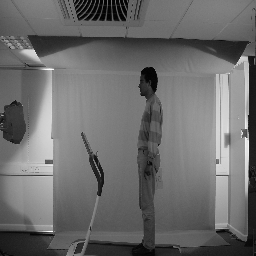

Number of faces detected: 0


In [6]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


def detect_face(image):
    # Converting image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detecting faces
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


    print(f"Faces detected: {len(faces)}")


    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return image, faces


image = train_images[0]  # Using any image from the list


if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Applying face detection
image_with_face, faces = detect_face(image)


cv2_imshow(image_with_face)


print(f"Number of faces detected: {len(faces)}")


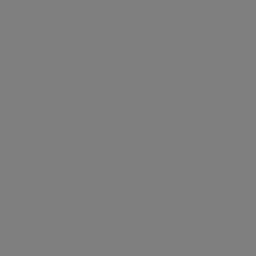

In [7]:

image = train_images[0]

# Background Subtraction using GMM
fgbg = cv2.createBackgroundSubtractorMOG2()

def background_subtraction(image):

    fg_mask = fgbg.apply(image)


    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))

    return fg_mask

# Testing background subtraction on the selected image
fg_mask = background_subtraction(image)


from google.colab.patches import cv2_imshow
cv2_imshow(fg_mask)


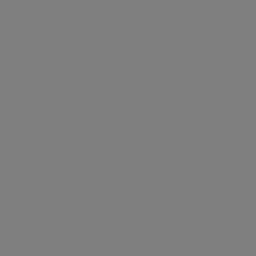

True

In [8]:
import cv2
import numpy as np

# Create background subtractor using GMM
fgbg = cv2.createBackgroundSubtractorMOG2()


def background_subtraction(image):

    fg_mask = fgbg.apply(image)

    # Optional: Applying morphological operations to clean up the mask (remove small noise)
    fg_mask_cleaned = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))

    return fg_mask_cleaned

# Testing background subtraction on an image
image = train_images[0]

# Applying background subtraction to the image
fg_mask_cleaned = background_subtraction(image)

# Converting mask to a color image for better visualization
fg_mask_colored = cv2.cvtColor(fg_mask_cleaned, cv2.COLOR_GRAY2BGR)


from google.colab.patches import cv2_imshow
cv2_imshow(fg_mask_colored)


cv2.imwrite('foreground_mask.png', fg_mask_cleaned)


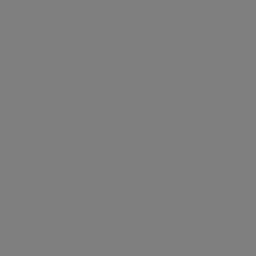

True

In [10]:
import cv2
import numpy as np

# Create background subtractor using GMM
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

# Function to perform background subtraction
def background_subtraction(image):
    # Apply background subtraction
    fg_mask = fgbg.apply(image)

    # Optional: Apply morphological operations to clean up the mask (remove small noise)
    fg_mask_cleaned = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))

    return fg_mask_cleaned

# Test background subtraction on an image
image = train_images[0]

# Apply background subtraction to the image
fg_mask_cleaned = background_subtraction(image)

# Display the raw foreground mask (no color conversion, just binary)
from google.colab.patches import cv2_imshow
cv2_imshow(fg_mask_cleaned)

# Optionally: Save the result if you want to check the output later
cv2.imwrite('foreground_mask.png', fg_mask_cleaned)


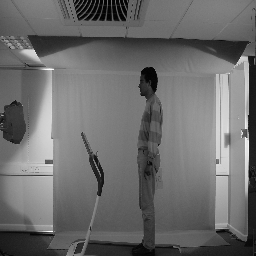

In [11]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)


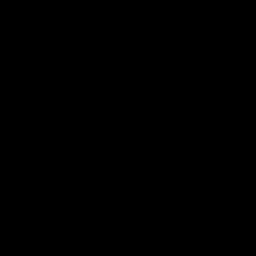

In [12]:
# Applying thresholding
_, fg_mask_thresh = cv2.threshold(fg_mask_cleaned, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(fg_mask_thresh)


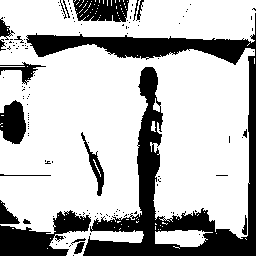

In [15]:
# Convert image to grayscale


# Using Otsu's thresholding to create a binary mask
_, otsu_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(otsu_mask)


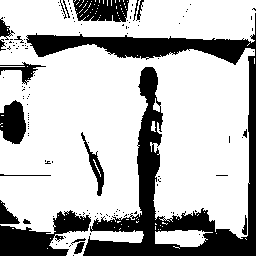

In [16]:
# Check if the image is already grayscale
if len(image.shape) == 3 and image.shape[2] == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image  # Image is already grayscale

# Use Otsu's thresholding to create a binary mask
_, otsu_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
from google.colab.patches import cv2_imshow
cv2_imshow(otsu_mask)


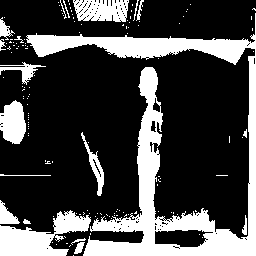

In [17]:
# Invert the binary mask so the subject becomes white and the background black
inverted_mask = cv2.bitwise_not(otsu_mask)
cv2_imshow(inverted_mask)


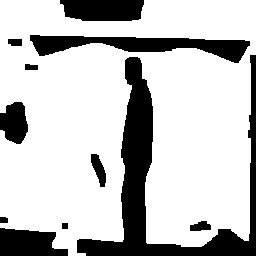

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Get or define the image
# Example: If you have a list of images named 'train_images', pick one:
image = train_images[5]

# 2. Convert the image to grayscale if it has 3 channels (BGR)
if len(image.shape) == 3 and image.shape[2] == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image  # It's already grayscale

# 3. Otsu's thresholding to create a binary mask
#    This will give you 'otsu_mask' where the foreground is white and the background is black
_, otsu_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4. (Optional) Invert the mask if your subject is black and background is white
#    For example:
# otsu_mask = cv2.bitwise_not(otsu_mask)

# 5. Morphological operations to clean the mask
kernel = np.ones((5, 5), np.uint8)

# a) Opening: remove small white noise
opened_mask = cv2.morphologyEx(otsu_mask, cv2.MORPH_OPEN, kernel)

# b) Closing: fill small holes within the subject
closed_mask = cv2.morphologyEx(opened_mask, cv2.MORPH_CLOSE, kernel)

# 6. Ensure the mask is strictly binary
_, final_mask = cv2.threshold(closed_mask, 127, 255, cv2.THRESH_BINARY)

# 7. (Optional) Keep only the largest connected component
def keep_largest_component(binary_mask):
    # Find all connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_mask, connectivity=8)

    largest_label = 1
    largest_area = 0

    # Start from label_id = 1 to skip background (label_id = 0)
    for label_id in range(1, num_labels):
        area = stats[label_id, cv2.CC_STAT_AREA]
        if area > largest_area:
            largest_area = area
            largest_label = label_id

    # Create a mask for only the largest connected component
    largest_mask = np.zeros_like(binary_mask)
    largest_mask[labels == largest_label] = 255

    return largest_mask

largest_component_mask = keep_largest_component(final_mask)

# 8. Display the refined mask
cv2_imshow(largest_component_mask)


Aspect Ratio: 1.000
Perimeter: 1589.061
Silhouette Area: 52662.500


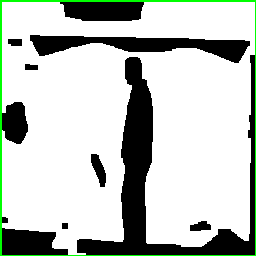

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to extract basic shape features
def extract_basic_features(binary_mask):
    # Find contours from the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No contours found!")
        return None

    # Get the largest contour (which should be the silhouette)
    largest_contour = max(contours, key=cv2.contourArea)

    # 1️⃣ Bounding Box
    x, y, w, h = cv2.boundingRect(largest_contour)

    # 2️⃣ Aspect Ratio (Height / Width)
    aspect_ratio = h / float(w)

    # 3️⃣ Contour Perimeter (Silhouette Boundary Length)
    perimeter = cv2.arcLength(largest_contour, closed=True)

    # 4️⃣ Silhouette Area (Total White Pixel Count)
    area = cv2.contourArea(largest_contour)

    # Draw bounding box on the silhouette
    bbox_image = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)  # Convert to color to draw
    cv2.rectangle(bbox_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box

    # Display results
    print(f"Aspect Ratio: {aspect_ratio:.3f}")
    print(f"Perimeter: {perimeter:.3f}")
    print(f"Silhouette Area: {area:.3f}")

    cv2_imshow(bbox_image)  # Show the bounding box overlay

    return aspect_ratio, perimeter, area

# Apply the function to the processed silhouette
basic_features = extract_basic_features(largest_component_mask)


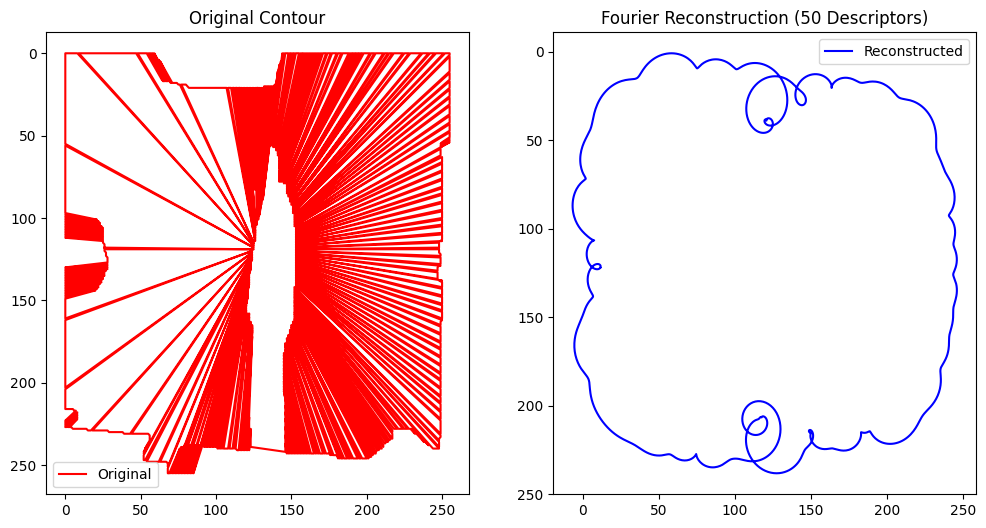

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Function to compute and visualize Fourier Descriptors
def compute_fourier_descriptors(binary_mask, num_descriptors=50):
    # 1. Find contours using a dense method to get all points
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if len(contours) == 0:
        print("No contours found!")
        return None, None

    # 2. Get the largest contour (assumed to be the silhouette)
    largest_contour = max(contours, key=cv2.contourArea)

    # 3. Compute the centroid to center the contour points
    M = cv2.moments(largest_contour)
    if M["m00"] == 0:
        print("Zero division error in centroid computation!")
        return None, None
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

    # 4. Convert contour from shape (N, 1, 2) to (N, 2) and center the points
    contour_pts = largest_contour.squeeze()
    centered_contour = contour_pts - np.array([cx, cy])

    # 5. Sort the contour points by angle to get an ordered shape outline
    angles = np.arctan2(centered_contour[:, 1], centered_contour[:, 0])
    sort_idx = np.argsort(angles)
    sorted_contour = centered_contour[sort_idx]

    # 6. Ensure the contour is closed by checking first and last points
    if not np.array_equal(sorted_contour[0], sorted_contour[-1]):
        sorted_contour = np.vstack([sorted_contour, sorted_contour[0]])

    # 7. Convert sorted contour points to complex numbers
    contour_complex = np.array([complex(x, y) for x, y in sorted_contour])

    # 8. Apply the Fourier Transform
    fourier_result = np.fft.fft(contour_complex)

    # 9. Filter the Fourier coefficients: keep only the first num_descriptors coefficients (low-frequency)
    fourier_filtered = np.zeros_like(fourier_result)
    fourier_filtered[:num_descriptors] = fourier_result[:num_descriptors]

    # 10. Inverse Fourier Transform to reconstruct the contour
    reconstructed_complex = np.fft.ifft(fourier_filtered)
    reconstructed_contour = np.array([[pt.real, pt.imag] for pt in reconstructed_complex])

    # 11. Add the centroid back to the reconstructed points for visualization
    reconstructed_contour += np.array([cx, cy])

    # Plot the original and reconstructed contour for comparison
    plt.figure(figsize=(12, 6))

    # Plot original contour (shifted back for visualization)
    plt.subplot(1, 2, 1)
    # Re-add the centroid to the sorted (original) contour points
    original_contour_plot = sorted_contour + np.array([cx, cy])
    plt.plot(original_contour_plot[:, 0], original_contour_plot[:, 1], 'r-', label="Original")
    plt.title("Original Contour")
    plt.gca().invert_yaxis()
    plt.legend()

    # Plot reconstructed contour
    plt.subplot(1, 2, 2)
    plt.plot(reconstructed_contour[:, 0], reconstructed_contour[:, 1], 'b-', label="Reconstructed")
    plt.title(f"Fourier Reconstruction ({num_descriptors} Descriptors)")
    plt.gca().invert_yaxis()
    plt.legend()

    plt.show()

    return fourier_result[:num_descriptors], reconstructed_contour

# Apply the Fourier descriptor function to your refined mask
fourier_descriptors, reconstructed_contour = compute_fourier_descriptors(largest_component_mask, num_descriptors=50)


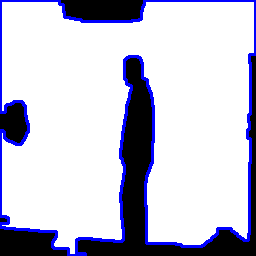

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1️⃣ Find Contours in the Binary Mask
contours, _ = cv2.findContours(largest_component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 2️⃣ Filter Out Small Contours (Assume ID card is small)
filtered_contours = []
min_area_threshold = 5000  # Adjust based on your image resolution

for cnt in contours:
    if cv2.contourArea(cnt) > min_area_threshold:
        filtered_contours.append(cnt)  # Keep only large ones (body)

# 3️⃣ Create a New Mask with Only the Large Contours
filtered_mask = np.zeros_like(largest_component_mask)
cv2.drawContours(filtered_mask, filtered_contours, -1, 255, thickness=cv2.FILLED)

# 4️⃣ Display the Refined Silhouette
debug_img = cv2.cvtColor(filtered_mask, cv2.COLOR_GRAY2BGR)
cv2.drawContours(debug_img, filtered_contours, -1, (255, 0, 0), 2)  # Blue contour

cv2_imshow(debug_img)


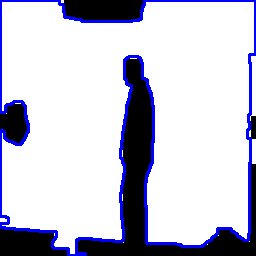

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1️⃣ Find all external contours in the binary mask
contours, _ = cv2.findContours(largest_component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 2️⃣ Set a threshold to ignore small pieces like the ID card
min_area_threshold = 3000  # Slightly lower to catch all body parts

# 3️⃣ Keep all contours larger than the threshold (multiple body parts)
large_body_parts = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area_threshold]

# 4️⃣ Create a new blank mask
merged_mask = np.zeros_like(largest_component_mask)

# 5️⃣ Draw ALL large body parts into the new mask
cv2.drawContours(merged_mask, large_body_parts, -1, 255, thickness=cv2.FILLED)

# 6️⃣ Optional: Apply a small closing to smooth the merged result
kernel = np.ones((10, 10), np.uint8)
smoothed_mask = cv2.morphologyEx(merged_mask, cv2.MORPH_CLOSE, kernel)

# 7️⃣ Visualize
debug_img = cv2.cvtColor(smoothed_mask, cv2.COLOR_GRAY2BGR)
cv2.drawContours(debug_img, large_body_parts, -1, (255, 0, 0), 2)

cv2_imshow(debug_img)


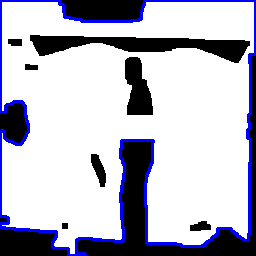

In [24]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Copy the original silhouette
fixed_mask = largest_component_mask.copy()

# Get image dimensions
h, w = fixed_mask.shape

# Draw a horizontal black rectangle where the ID card is (manual guess)
# You might need to adjust y1 and y2 depending on where the ID card appears
y1 = int(h * 0.45)
y2 = int(h * 0.55)
x1 = int(w * 0.3)
x2 = int(w * 0.7)

# Fill the gap where the ID card splits the body
cv2.rectangle(fixed_mask, (x1, y1), (x2, y2), 255, -1)  # Fill with white (body color)

# Now find contours
contours, _ = cv2.findContours(fixed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Create visualization
    debug_img = cv2.cvtColor(fixed_mask, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(debug_img, [largest_contour], -1, (255, 0, 0), 2)

    cv2_imshow(debug_img)
else:
    print("No contours found!")


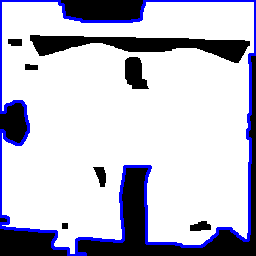

In [25]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Copy the silhouette mask
fixed_mask = largest_component_mask.copy()

# Get dimensions
h, w = fixed_mask.shape

# 🎯 Adjust the patch to cover more of the ID card region and reconnect better
y1 = int(h * 0.35)   # Move up to cover higher part (closer to head)
y2 = int(h * 0.65)   # Move down to also bridge torso area
x1 = int(w * 0.25)   # Wider patch left
x2 = int(w * 0.75)   # Wider patch right

# Draw the patch in white to reconnect the body
cv2.rectangle(fixed_mask, (x1, y1), (x2, y2), 255, -1)

# Recompute contours
contours, _ = cv2.findContours(fixed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw result
    debug_img = cv2.cvtColor(fixed_mask, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(debug_img, [largest_contour], -1, (255, 0, 0), 2)

    cv2_imshow(debug_img)
else:
    print("No contours found!")


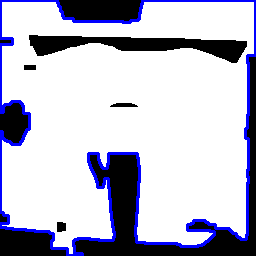

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Copy the silhouette mask
fixed_mask = largest_component_mask.copy()

# Get image dimensions
h, w = fixed_mask.shape

# 🎯 Patch 1: Reconnect upper body to head
head_patch_top = int(h * 0.20)
head_patch_bottom = int(h * 0.40)
head_patch_left = int(w * 0.30)
head_patch_right = int(w * 0.70)

# 🎯 Patch 2: Reconnect torso (middle)
torso_patch_top = int(h * 0.42)
torso_patch_bottom = int(h * 0.60)
torso_patch_left = int(w * 0.25)
torso_patch_right = int(w * 0.75)

# Draw both patches to "bridge" over the ID card
cv2.rectangle(fixed_mask, (head_patch_left, head_patch_top), (head_patch_right, head_patch_bottom), 255, -1)
cv2.rectangle(fixed_mask, (torso_patch_left, torso_patch_top), (torso_patch_right, torso_patch_bottom), 255, -1)

# Find contours
contours, _ = cv2.findContours(fixed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw result
    debug_img = cv2.cvtColor(fixed_mask, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(debug_img, [largest_contour], -1, (255, 0, 0), 2)

    cv2_imshow(debug_img)
else:
    print("No contours found!")


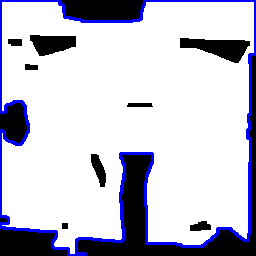

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

fixed_mask = largest_component_mask.copy()
h, w = fixed_mask.shape

# 🔼 Head patch (move it higher and make it taller)
head_patch_top = int(h * 0.10)  # was 0.20 → move up
head_patch_bottom = int(h * 0.40)  # keep bottom the same
head_patch_left = int(w * 0.30)
head_patch_right = int(w * 0.70)

# ⏬ Torso patch (keep it working)
torso_patch_top = int(h * 0.42)
torso_patch_bottom = int(h * 0.60)
torso_patch_left = int(w * 0.25)
torso_patch_right = int(w * 0.75)

# Draw both patches
cv2.rectangle(fixed_mask, (head_patch_left, head_patch_top), (head_patch_right, head_patch_bottom), 255, -1)
cv2.rectangle(fixed_mask, (torso_patch_left, torso_patch_top), (torso_patch_right, torso_patch_bottom), 255, -1)

# Recalculate contour
contours, _ = cv2.findContours(fixed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    debug_img = cv2.cvtColor(fixed_mask, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(debug_img, [largest_contour], -1, (255, 0, 0), 2)
    cv2_imshow(debug_img)
else:
    print("No contours found!")


In [27]:
import cv2
import numpy as np

def fix_id_card_silhouette(img_path, face_cascade_path='haarcascade_frontalface_default.xml'):
    # Step 1: Read binary silhouette image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Step 2: Invert image for contouring (black=255, white=0)
    inv = cv2.bitwise_not(img)

    # Step 3: Face detection (optional but helps anchor the region)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + face_cascade_path)
    rgb = cv2.imread(img_path)
    faces = face_cascade.detectMultiScale(rgb, scaleFactor=1.1, minNeighbors=5)

    # Step 4: Define ROI below the face
    h, w = img.shape
    mask = np.zeros_like(inv)

    if len(faces) > 0:
        (x, y, fw, fh) = faces[0]
        y_start = y + fh  # start below the face
    else:
        y_start = h // 3  # fallback if no face detected

    # Step 5: Connected components only below face
    region = inv[y_start:, :]
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(region, connectivity=8)

    if num_labels > 1:
        largest = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])  # skip background
        component = (labels == largest).astype(np.uint8) * 255
        mask[y_start:, :] = component

    # Step 6: Merge upper silhouette (head/shoulders) with corrected lower blob
    fixed = cv2.bitwise_and(inv, inv)  # clone
    fixed[y_start:, :] = mask[y_start:, :]

    # Step 7: Optional Morphological Closing
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    closed = cv2.morphologyEx(fixed, cv2.MORPH_CLOSE, kernel)

    # Step 8: Final inversion to restore original format
    final = cv2.bitwise_not(closed)

    return final


#START FROM HERE

In [28]:
#START FROM HERE
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to your dataset
dataset_path = "/content/dataset/biometrics/"
training_path = os.path.join(dataset_path, "training")

#Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def process_image(image_path):

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold to binary (foreground = black, background = white)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Invert binary so person = white, background = black
    inv = cv2.bitwise_not(binary)


    h, w = inv.shape
    crop_start = int(w * 0.3)
    crop_end = int(w * 0.7)
    center_crop = np.zeros_like(inv)
    center_crop[:, crop_start:crop_end] = inv[:, crop_start:crop_end]

    # Finding contours in center crop
    contours, _ = cv2.findContours(center_crop, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No contours found.")
        return None

    # Selecting largest contour
    largest = max(contours, key=cv2.contourArea)

    # Drawing a silhouette mask
    final_mask = np.zeros_like(inv)
    cv2.drawContours(final_mask, [largest], -1, 255, thickness=cv2.FILLED)

    # Invert back: person = black, background = white
    result = cv2.bitwise_not(final_mask)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1); plt.imshow(gray, cmap='gray'); plt.title("Original")
    plt.subplot(1, 3, 2); plt.imshow(center_crop, cmap='gray'); plt.title("Center Crop")
    plt.subplot(1, 3, 3); plt.imshow(result, cmap='gray'); plt.title("Final Silhouette")
    plt.show()

    return result


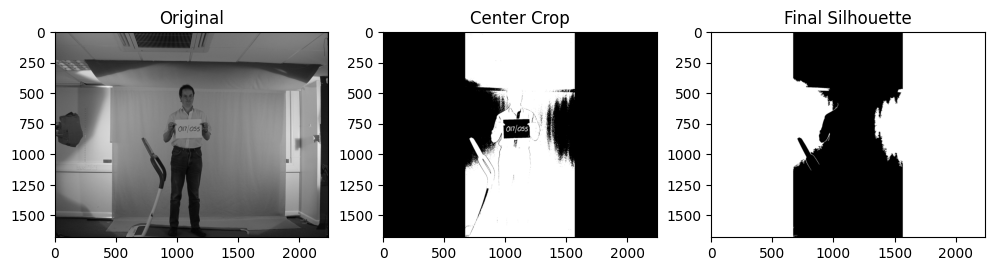

In [ ]:
img_path = os.path.join(training_path, '017z055pf.jpg')
fixed_silhouette = process_image(img_path)


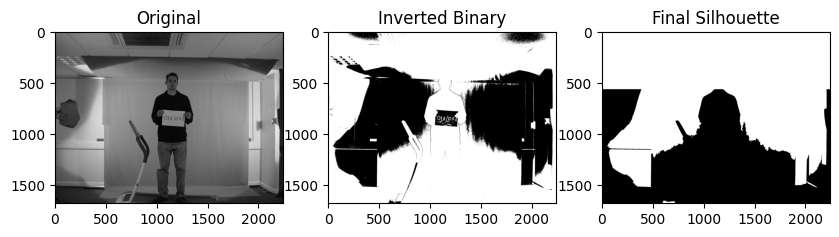

In [ ]:
# Test on a specific image
img_path = os.path.join(training_path, '016z052pf.jpg')  # example image
fixed_silhouette = process_image(img_path)


In [ ]:
def extract_shape_features(binary_img):
    # Invert so person = white (needed for findContours)
    silhouette = cv2.bitwise_not(binary_img)

    # Finding contour of the silhouette
    contours, _ = cv2.findContours(silhouette, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contour found in silhouette.")
        return None

    # Largest contour = person
    cnt = max(contours, key=cv2.contourArea)

    # Bounding box
    x, y, w, h = cv2.boundingRect(cnt)


    aspect_ratio = float(w) / h
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    bounding_box_area = w * h
    extent = float(area) / bounding_box_area  # compactness
    height = h
    width = w


    hu = cv2.HuMoments(cv2.moments(cnt)).flatten()

    # Building feature vector
    features = [
        area,
        perimeter,
        aspect_ratio,
        extent,
        height,
        width,
    ] + hu.tolist()  # append Hu moments

    return np.array(features)


In [ ]:
features = extract_shape_features(fixed_silhouette)

if features is not None:
    print("Feature vector:", features)
else:
    print("Feature extraction failed.")


Feature vector: [1.26400750e+06 1.37478378e+04 5.33333333e-01 8.39715867e-01
 1.68000000e+03 8.96000000e+02 2.60229111e-01 2.89834214e-02
 1.46576167e-04 8.32151511e-05 8.59950351e-09 1.26859787e-05
 3.24227263e-09]


In [ ]:
# Pick some training images (manually for now)
train_imgs = [
    '016z052pf.jpg',  # person 16
    '017z055pf.jpg',  # person 17
    '018z057pf.jpg',  # person 18
]

# Test image to classify
test_img = '017z055ps.jpg'  # side view of person 17


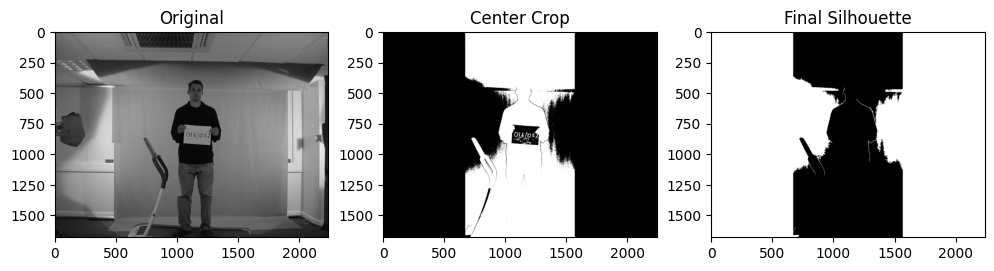

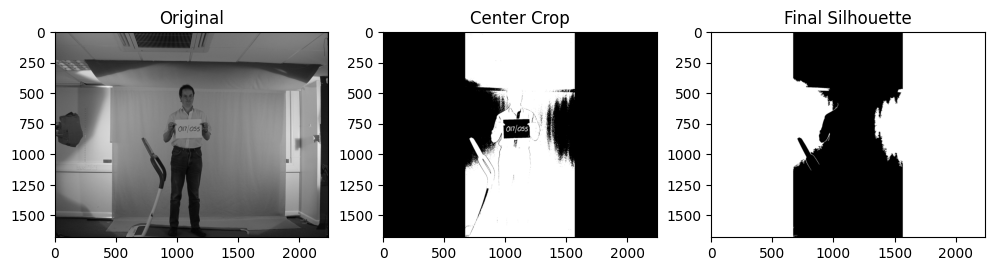

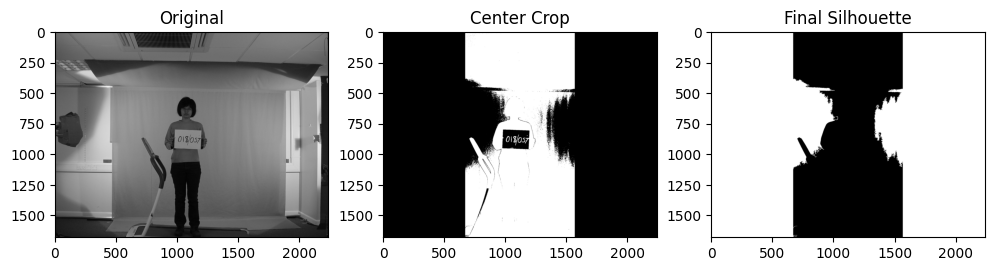

In [ ]:
# Store training features and labels
train_features = []
train_labels = []

for img_name in train_imgs:
    img_path = os.path.join(training_path, img_name)
    silhouette = process_image(img_path)
    features = extract_shape_features(silhouette)
    if features is not None:
        train_features.append(features)
        train_labels.append(img_name)  # you could use the person ID if needed


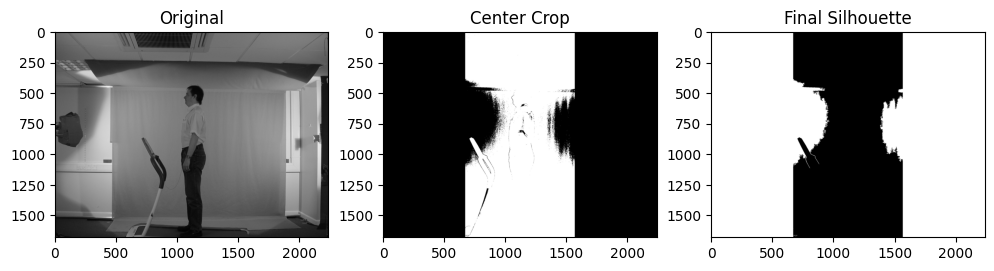

In [ ]:
# Process test image
test_path = os.path.join(training_path, test_img)
test_silhouette = process_image(test_path)
test_features = extract_shape_features(test_silhouette)


In [ ]:
from scipy.spatial.distance import euclidean

# Compare test image to each training image
print("Matching test image to training set:")
for i, features in enumerate(train_features):
    dist = euclidean(test_features, features)
    print(f"{test_img} → {train_labels[i]} | Distance = {dist:.2f}")


Matching test image to training set:
017z055ps.jpg → 016z052pf.jpg | Distance = 91980.09
017z055ps.jpg → 017z055pf.jpg | Distance = 33438.90
017z055ps.jpg → 018z057pf.jpg | Distance = 50331.25


In [ ]:
# Training set
train_imgs = [
    '016z052pf.jpg',  # person 016
    '017z055pf.jpg',  # person 017
    '018z057pf.jpg',  # person 018
]

# Test set (same people, different views — side-facing)
test_imgs = [
    '016z052ps.jpg',
    '017z055ps.jpg',
    '018z057ps.jpg',
]


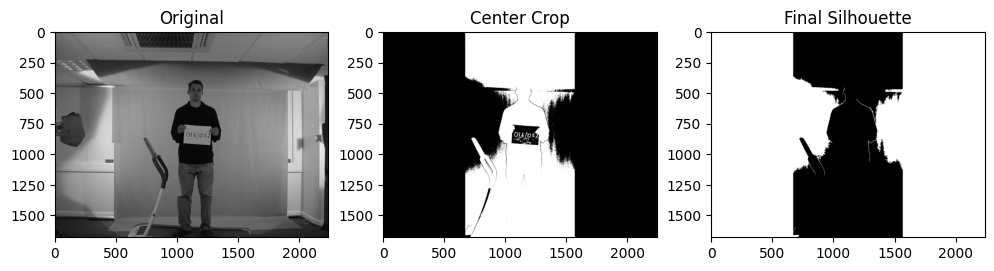

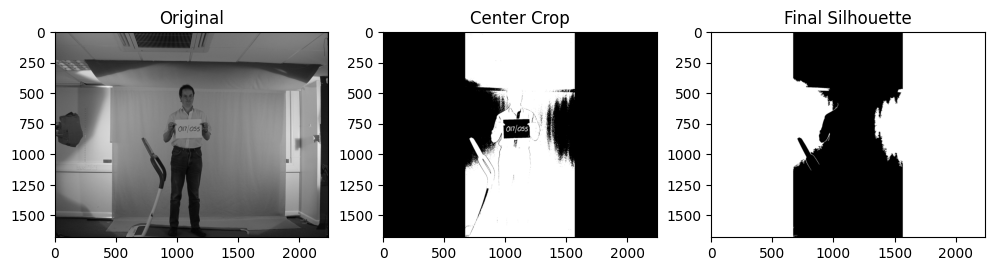

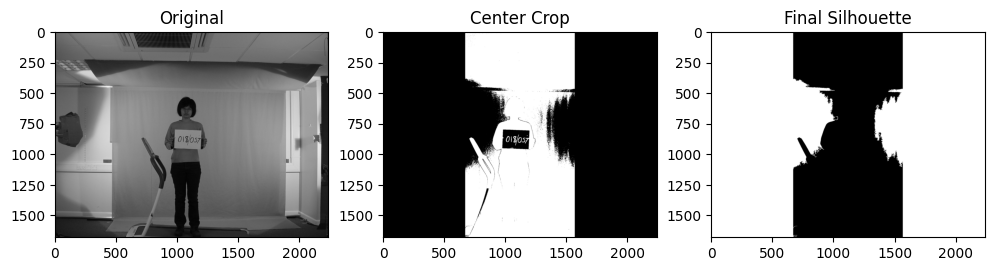


Matching Test Set:


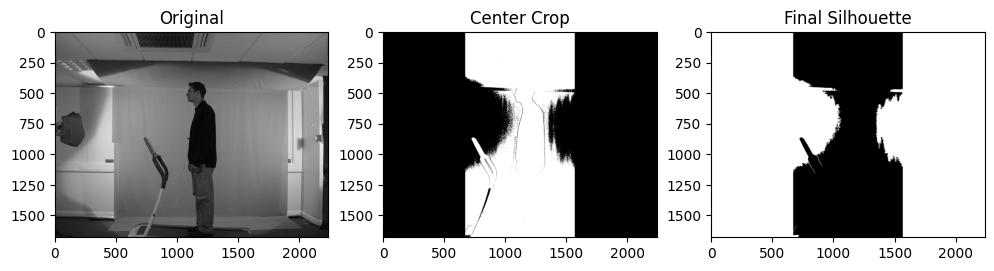

016z052ps.jpg: Predicted = 016, Actual = 016


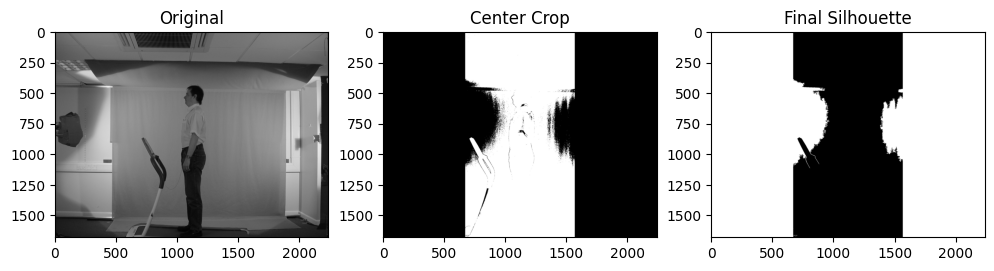

017z055ps.jpg: Predicted = 017, Actual = 017


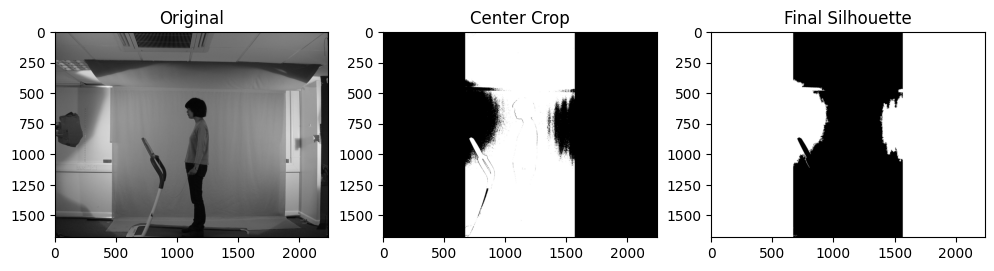

018z057ps.jpg: Predicted = 017, Actual = 018

✅ CCR = 66.67% (2/3 correct)


In [ ]:
from scipy.spatial.distance import euclidean

# Store training features and labels
train_features = []
train_labels = []

# Build training database
for img_name in train_imgs:
    img_path = os.path.join(training_path, img_name)
    silhouette = process_image(img_path)
    features = extract_shape_features(silhouette)
    if features is not None:
        train_features.append(features)
        person_id = img_name.split('z')[0]  # e.g., '016'
        train_labels.append(person_id)

# Now test
correct = 0
total = len(test_imgs)

print("\nMatching Test Set:")
for test_img in test_imgs:
    test_path = os.path.join(training_path, test_img)
    test_silhouette = process_image(test_path)
    test_features = extract_shape_features(test_silhouette)

    if test_features is None:
        print(f"{test_img}: Feature extraction failed.")
        continue

    # Match to training set
    distances = [euclidean(test_features, train_feat) for train_feat in train_features]
    best_idx = np.argmin(distances)
    predicted_id = train_labels[best_idx]
    true_id = test_img.split('z')[0]

    print(f"{test_img}: Predicted = {predicted_id}, Actual = {true_id}")

    if predicted_id == true_id:
        correct += 1

# CCR Calculation
ccr = (correct / total) * 100
print(f"\n CCR = {ccr:.2f}% ({correct}/{total} correct)")


In [ ]:
train_imgs = ['016z052ps.jpg', '017z055ps.jpg', '018z057ps.jpg']
test_imgs  = ['016z052ps.jpg', '017z055ps.jpg', '018z057ps.jpg']


In [ ]:
# Using only side-view images for both training and testing
train_imgs = [
    '016z052ps.jpg',
    '017z055ps.jpg',
    '018z057ps.jpg',
]

test_imgs = [
    '016z052ps.jpg',
    '017z055ps.jpg',
    '018z057ps.jpg',
]


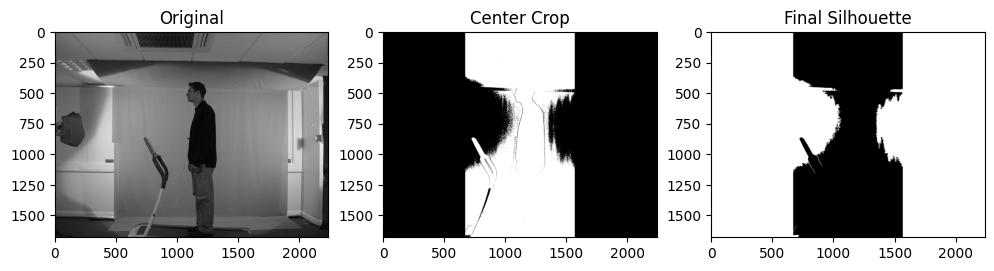

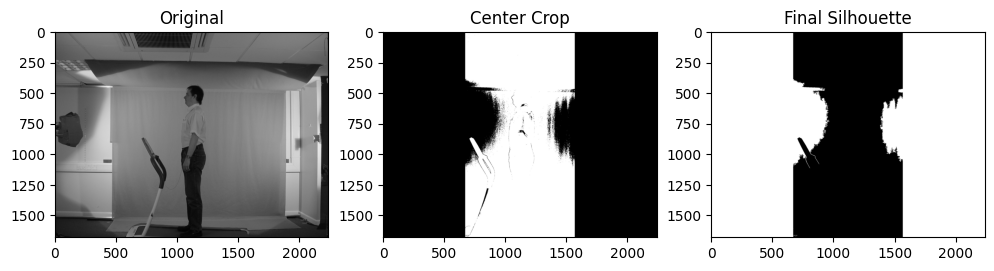

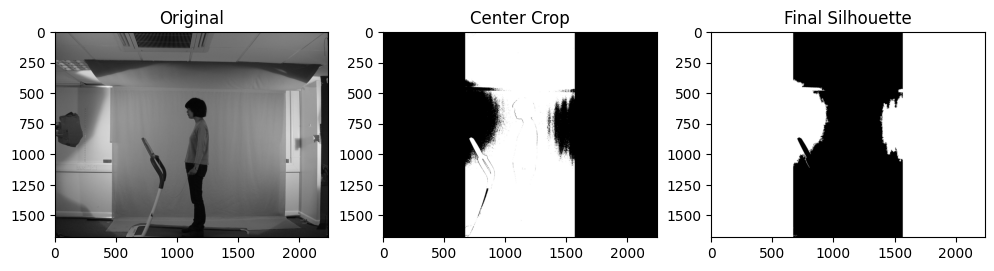


Matching Test Set:


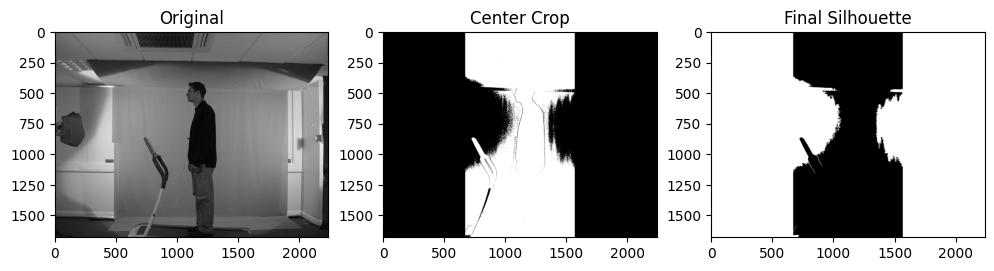

016z052ps.jpg: Predicted = 016, Actual = 016


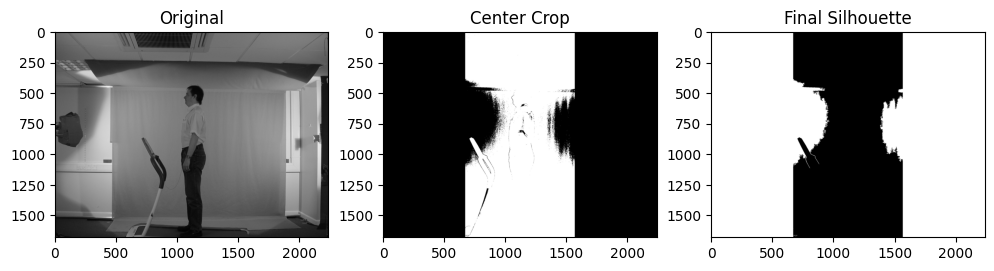

017z055ps.jpg: Predicted = 017, Actual = 017


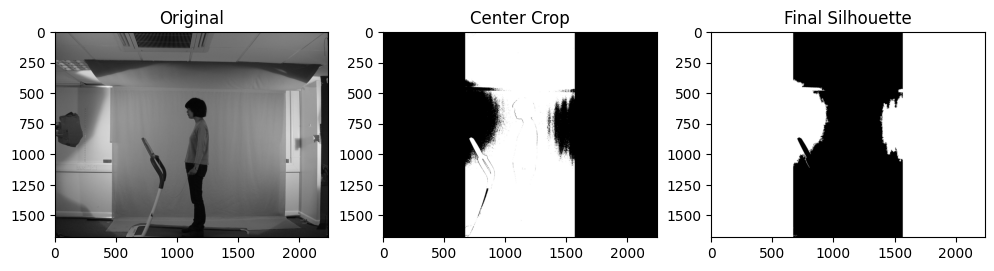

018z057ps.jpg: Predicted = 018, Actual = 018

✅ CCR = 100.00% (3/3 correct)


In [ ]:
from scipy.spatial.distance import euclidean

# Store training features and labels
train_features = []
train_labels = []

# Build training database
for img_name in train_imgs:
    img_path = os.path.join(training_path, img_name)
    silhouette = process_image(img_path)
    features = extract_shape_features(silhouette)
    if features is not None:
        train_features.append(features)
        person_id = img_name.split('z')[0]  # e.g., '016'
        train_labels.append(person_id)

# Test phase
correct = 0
total = len(test_imgs)

print("\nMatching Test Set:")
for test_img in test_imgs:
    test_path = os.path.join(training_path, test_img)
    test_silhouette = process_image(test_path)
    test_features = extract_shape_features(test_silhouette)

    if test_features is None:
        print(f"{test_img}: Feature extraction failed.")
        continue

    distances = [euclidean(test_features, train_feat) for train_feat in train_features]
    best_idx = np.argmin(distances)
    predicted_id = train_labels[best_idx]
    true_id = test_img.split('z')[0]

    print(f"{test_img}: Predicted = {predicted_id}, Actual = {true_id}")

    if predicted_id == true_id:
        correct += 1

ccr = (correct / total) * 100
print(f"\n CCR = {ccr:.2f}% ({correct}/{total} correct)")


In [ ]:
train_imgs = [
    '016z052pf.jpg', '016z052ps.jpg',
    '017z055pf.jpg', '017z055ps.jpg',
    '018z057pf.jpg', '018z057ps.jpg',
]


In [ ]:
test_imgs = [
    '016z052pf.jpg',
    '017z055ps.jpg',
    '018z057pf.jpg',
]


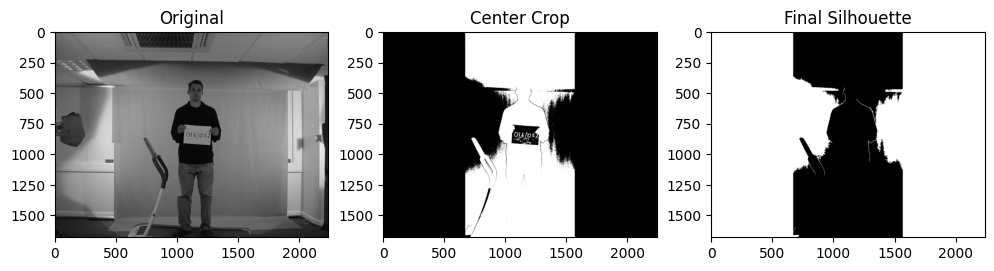

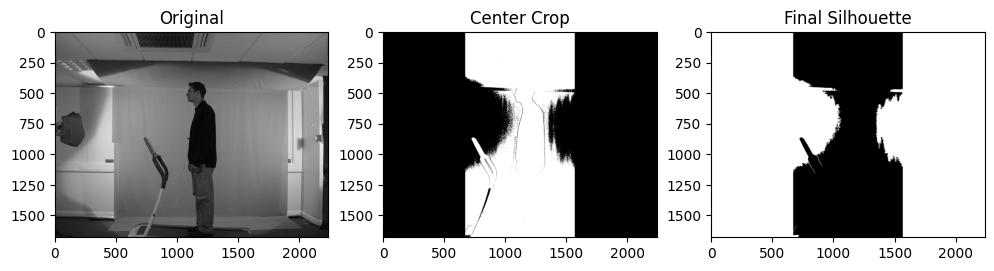

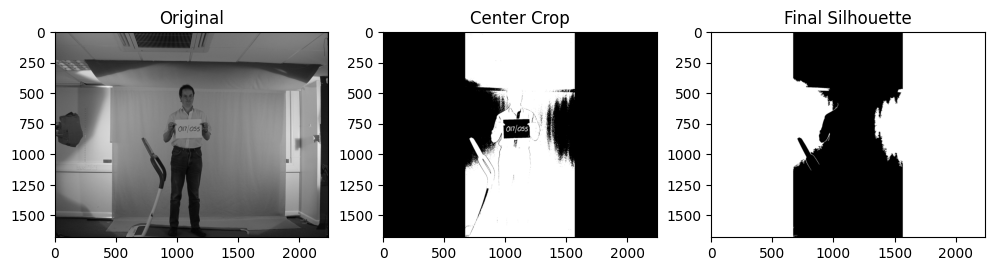

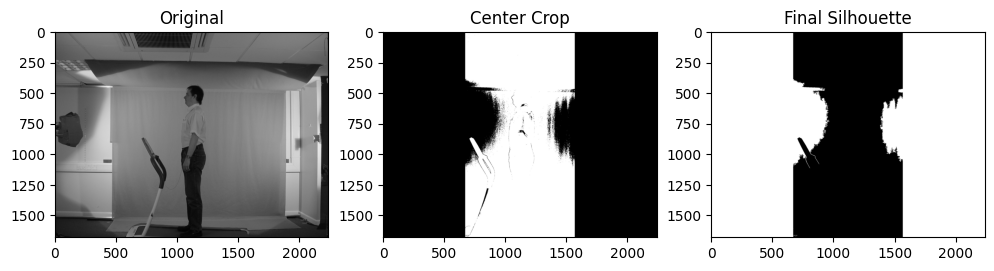

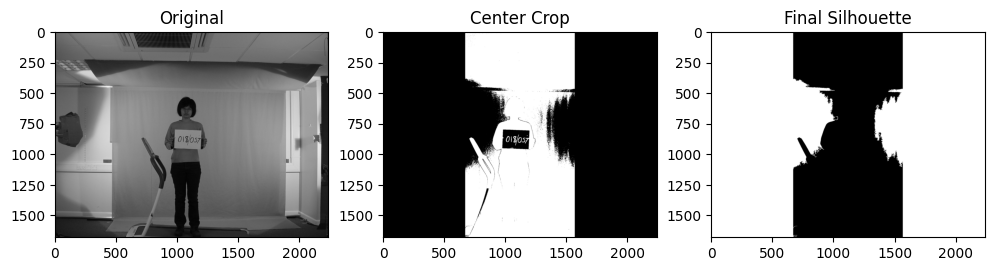

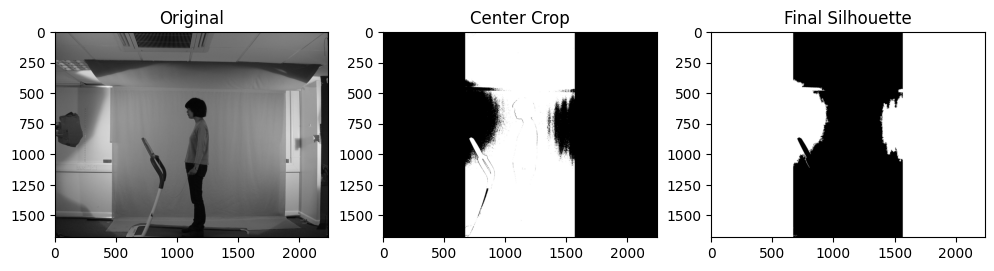


Matching Test Set:


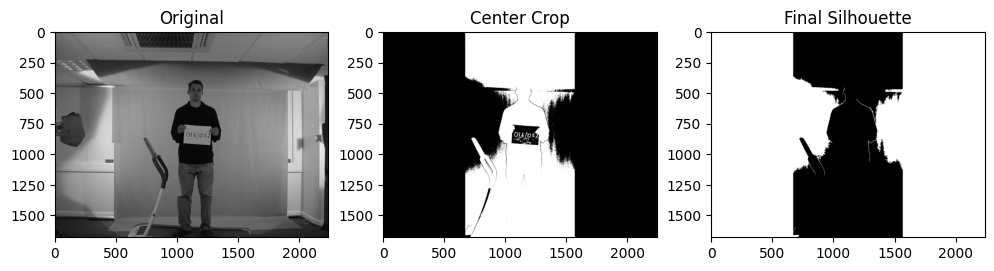

016z052pf.jpg: Predicted = 016, Actual = 016


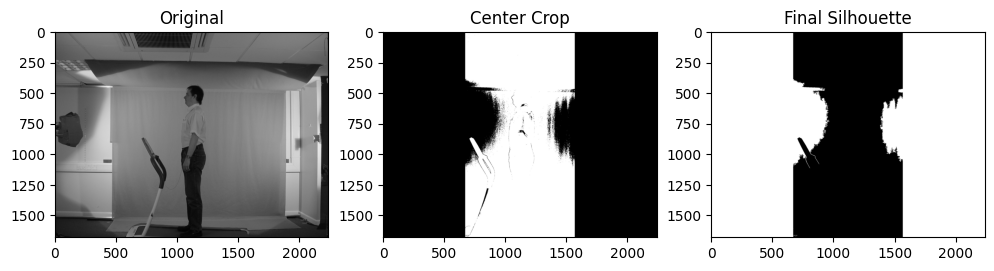

017z055ps.jpg: Predicted = 017, Actual = 017


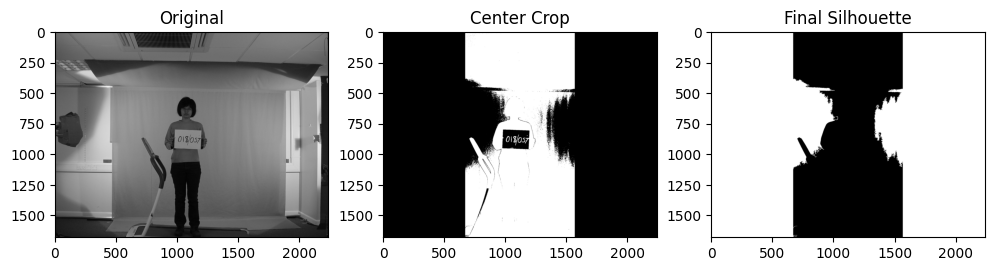

018z057pf.jpg: Predicted = 018, Actual = 018

✅ View-Independent CCR = 100.00% (3/3 correct)


In [ ]:
from scipy.spatial.distance import euclidean

train_features = []
train_labels = []

# Extract features for all training images
for img_name in train_imgs:
    img_path = os.path.join(training_path, img_name)
    silhouette = process_image(img_path)
    features = extract_shape_features(silhouette)
    if features is not None:
        train_features.append(features)
        person_id = img_name.split('z')[0]  # Extract ID like '016'
        train_labels.append(person_id)

# Test recognition with mixed-view images
correct = 0
total = len(test_imgs)

print("\nMatching Test Set:")
for test_img in test_imgs:
    test_path = os.path.join(training_path, test_img)
    test_silhouette = process_image(test_path)
    test_features = extract_shape_features(test_silhouette)

    if test_features is None:
        print(f"{test_img}: Feature extraction failed.")
        continue

    distances = [euclidean(test_features, f) for f in train_features]
    best_idx = np.argmin(distances)
    predicted_id = train_labels[best_idx]
    true_id = test_img.split('z')[0]

    print(f"{test_img}: Predicted = {predicted_id}, Actual = {true_id}")
    if predicted_id == true_id:
        correct += 1

ccr = (correct / total) * 100
print(f"\n View-Independent CCR = {ccr:.2f}% ({correct}/{total} correct)")


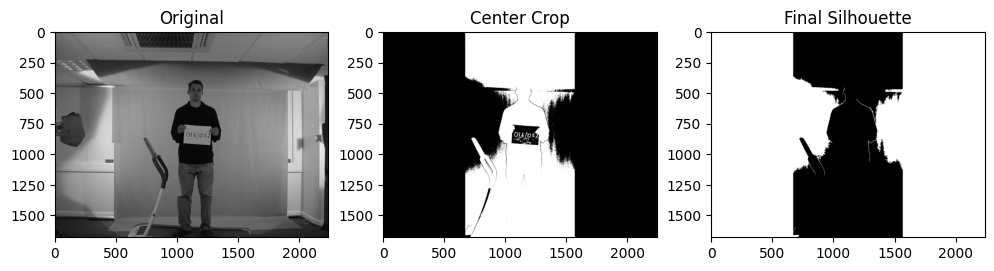

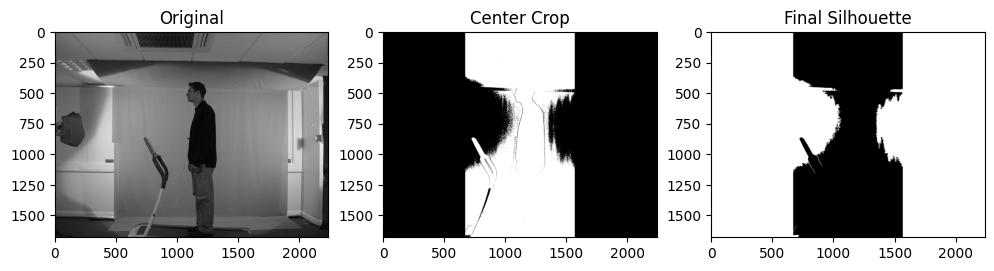

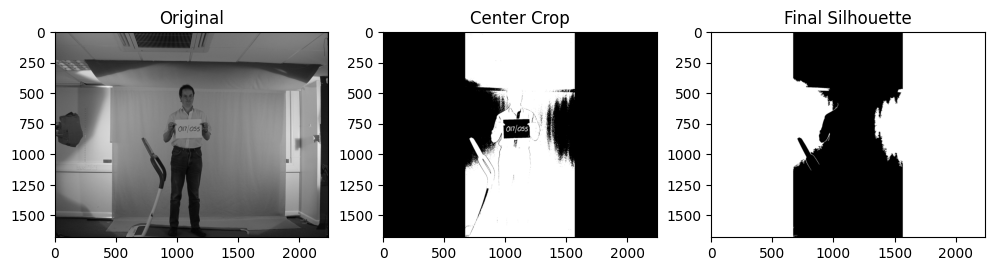

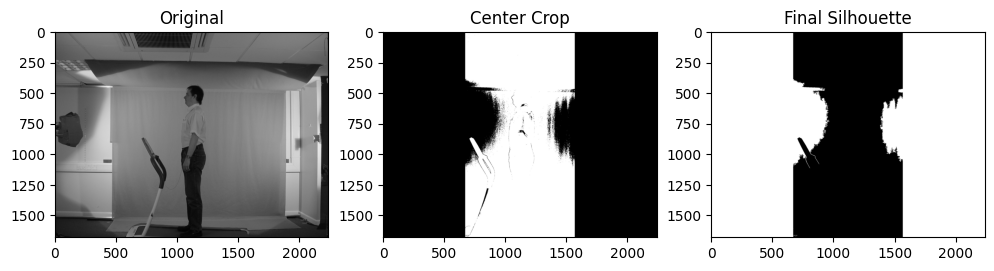

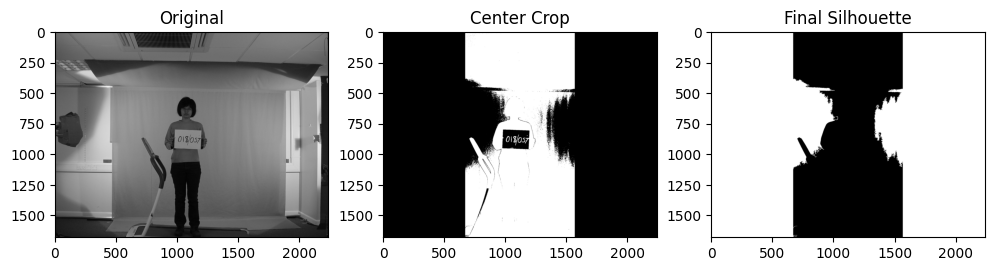

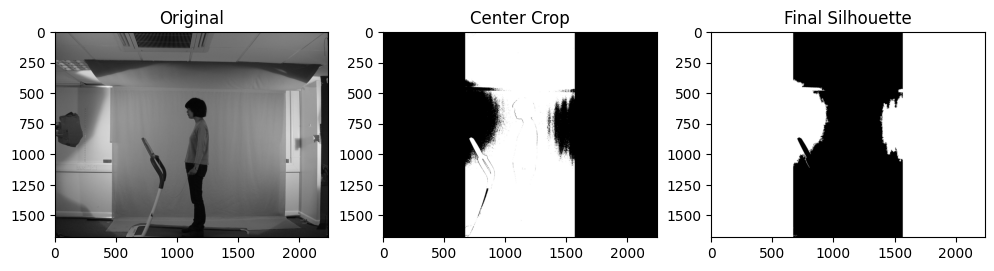

✅ Genuine pairs: 3
✅ Impostor pairs: 12


In [ ]:
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Step 1: Load features with labels
people = ['016', '017', '018']
view_suffixes = ['pf', 'ps']

features = {}
for pid in people:
    for suffix in view_suffixes:
        fname = f'{pid}z052{suffix}.jpg' if pid == '016' else f'{pid}z055{suffix}.jpg' if pid == '017' else f'{pid}z057{suffix}.jpg'
        path = os.path.join(training_path, fname)
        silhouette = process_image(path)
        feat = extract_shape_features(silhouette)
        if feat is not None:
            features[f"{pid}_{suffix}"] = feat

# Step 2: Generate pairwise distances
genuine_distances = []
impostor_distances = []

keys = list(features.keys())

for i in range(len(keys)):
    for j in range(i+1, len(keys)):
        id1 = keys[i].split('_')[0]
        id2 = keys[j].split('_')[0]
        d = euclidean(features[keys[i]], features[keys[j]])
        if id1 == id2:
            genuine_distances.append(d)
        else:
            impostor_distances.append(d)

print(f" Genuine pairs: {len(genuine_distances)}")
print(f" Impostor pairs: {len(impostor_distances)}")


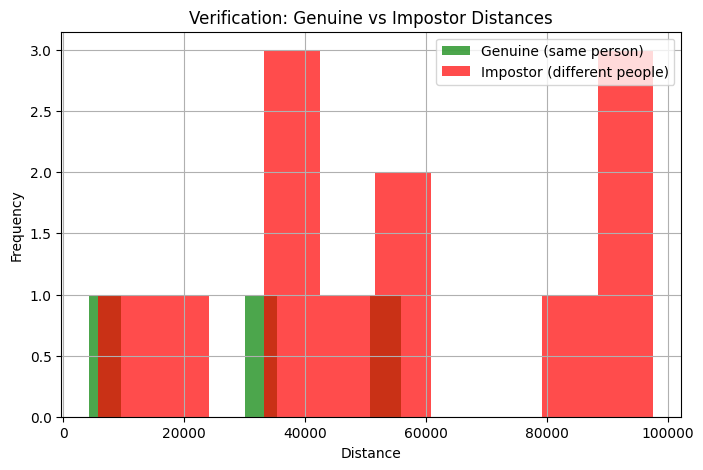

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(genuine_distances, bins=10, alpha=0.7, color='green', label='Genuine (same person)')
plt.hist(impostor_distances, bins=10, alpha=0.7, color='red', label='Impostor (different people)')
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Verification: Genuine vs Impostor Distances")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np


all_scores = []
all_labels = []  # 1 = genuine, 0 = impostor

for d in genuine_distances:
    all_scores.append(d)
    all_labels.append(1)

for d in impostor_distances:
    all_scores.append(d)
    all_labels.append(0)

# Sort by distance threshold
thresholds = np.linspace(min(all_scores), max(all_scores), 100)
FARs = []
FRRs = []

for t in thresholds:
    FAR = sum((s <= t and l == 0) for s, l in zip(all_scores, all_labels)) / len(impostor_distances)
    FRR = sum((s > t and l == 1) for s, l in zip(all_scores, all_labels)) / len(genuine_distances)
    FARs.append(FAR)
    FRRs.append(FRR)

# Find EER
eer_idx = np.argmin(np.abs(np.array(FARs) - np.array(FRRs)))
EER = (FARs[eer_idx] + FRRs[eer_idx]) / 2
eer_threshold = thresholds[eer_idx]

print(f"\n Equal Error Rate (EER): {EER:.2%}")
print(f"📏 At threshold = {eer_threshold:.2f}")



✅ Equal Error Rate (EER): 33.33%
📏 At threshold = 39188.64


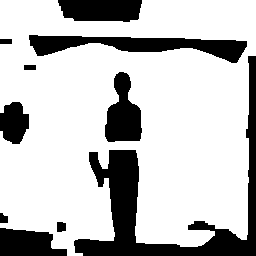

In [ ]:
# Just visualize the original silhouette mask without any modifications
from google.colab.patches import cv2_imshow
cv2_imshow(largest_component_mask)


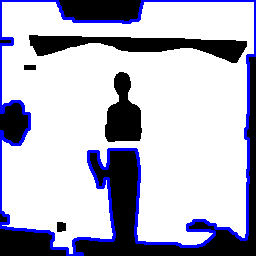

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Find the largest contour in largest_component_mask
contours, _ = cv2.findContours(largest_component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
else:
    print("No contours found!")
    largest_contour = None

# Then draw it
if largest_contour is not None:
    debug_img = cv2.cvtColor(largest_component_mask, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(debug_img, [largest_contour], -1, (255, 0, 0), 2)


    cv2_imshow(debug_img)


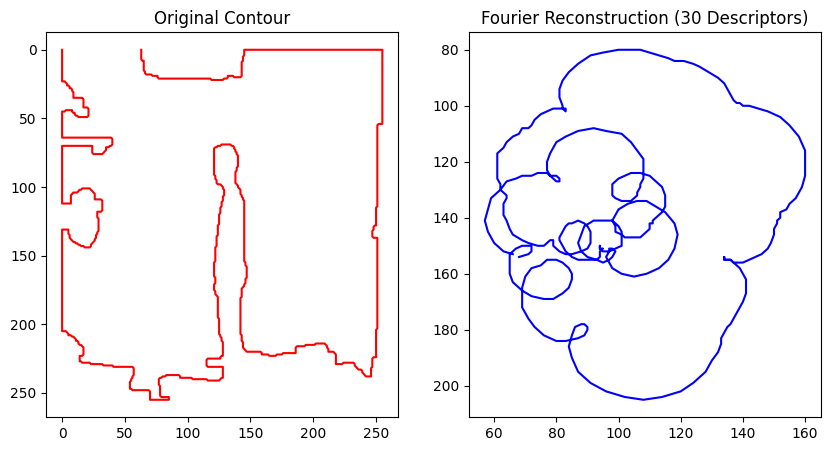

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute and visualize Fourier Descriptors
def compute_fourier_descriptors(binary_mask, num_descriptors=30):
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No contours found!")
        return None

    # Get the largest contour (silhouette)
    largest_contour = max(contours, key=cv2.contourArea)

    # Convert contour points to complex numbers
    contour_complex = np.array([complex(pt[0][0], pt[0][1]) for pt in largest_contour])

    # Apply Fourier Transform
    fourier_result = np.fft.fft(contour_complex)

    # Keep only the first `num_descriptors` coefficients (low-frequency components)
    fourier_filtered = np.zeros_like(fourier_result)
    fourier_filtered[:num_descriptors] = fourier_result[:num_descriptors]

    # Inverse Fourier Transform to reconstruct contour
    reconstructed_contour = np.fft.ifft(fourier_filtered)

    # Convert back to (x, y) coordinates
    reconstructed_contour = np.array([[int(pt.real), int(pt.imag)] for pt in reconstructed_contour])

    # Plot original and reconstructed contour
    plt.figure(figsize=(10, 5))

    # Original contour
    plt.subplot(1, 2, 1)
    plt.plot(largest_contour[:, 0, 0], largest_contour[:, 0, 1], 'r', label="Original")
    plt.gca().invert_yaxis()
    plt.title("Original Contour")

    # Reconstructed contour
    plt.subplot(1, 2, 2)
    plt.plot(reconstructed_contour[:, 0], reconstructed_contour[:, 1], 'b', label="Reconstructed")
    plt.gca().invert_yaxis()
    plt.title(f"Fourier Reconstruction ({num_descriptors} Descriptors)")

    plt.show()

    return fourier_result[:num_descriptors]  # Return Fourier descriptors for further use

# Apply to the processed silhouette
fourier_descriptors = compute_fourier_descriptors(largest_component_mask)


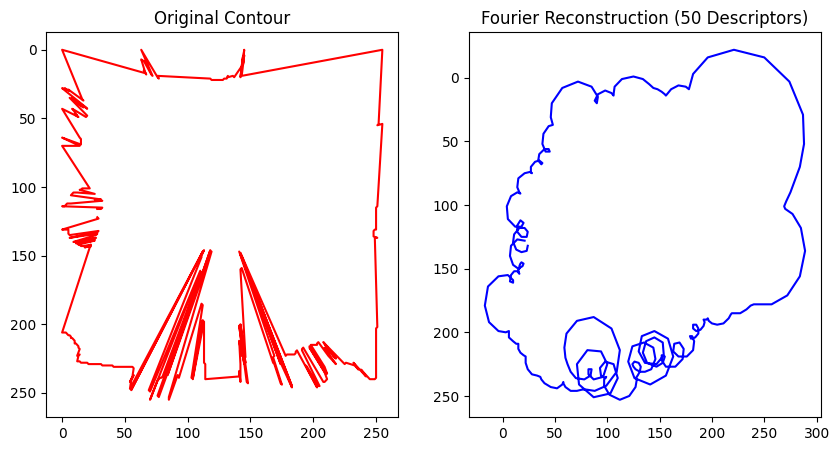

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute and visualize Fourier Descriptors
def compute_fourier_descriptors(binary_mask, num_descriptors=50):
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No contours found!")
        return None

    # Get the largest contour (silhouette)
    largest_contour = max(contours, key=cv2.contourArea)

    # Ensure contour is in correct order (sort points by angle from centroid)
    moments = cv2.moments(largest_contour)
    centroid_x = int(moments["m10"] / moments["m00"])
    centroid_y = int(moments["m01"] / moments["m00"])

    # Sort contour points by angle relative to centroid
    def angle_sort(pt):
        return np.arctan2(pt[0][1] - centroid_y, pt[0][0] - centroid_x)

    largest_contour = sorted(largest_contour, key=angle_sort)
    largest_contour = np.array(largest_contour)  # Convert back to NumPy array

    # Convert contour points to complex numbers
    contour_complex = np.array([complex(pt[0][0], pt[0][1]) for pt in largest_contour])

    # Apply Fourier Transform
    fourier_result = np.fft.fft(contour_complex)

    # Keep only the first `num_descriptors` coefficients (low-frequency components)
    fourier_filtered = np.zeros_like(fourier_result)
    fourier_filtered[:num_descriptors] = fourier_result[:num_descriptors]

    # Inverse Fourier Transform to reconstruct contour
    reconstructed_contour = np.fft.ifft(fourier_filtered)

    # Convert back to (x, y) coordinates
    reconstructed_contour = np.array([[int(pt.real), int(pt.imag)] for pt in reconstructed_contour])

    # Plot original and reconstructed contour
    plt.figure(figsize=(10, 5))

    # Original contour
    plt.subplot(1, 2, 1)
    plt.plot(largest_contour[:, 0, 0], largest_contour[:, 0, 1], 'r', label="Original")
    plt.gca().invert_yaxis()
    plt.title("Original Contour")

    # Reconstructed contour
    plt.subplot(1, 2, 2)
    plt.plot(reconstructed_contour[:, 0], reconstructed_contour[:, 1], 'b', label="Reconstructed")
    plt.gca().invert_yaxis()
    plt.title(f"Fourier Reconstruction ({num_descriptors} Descriptors)")

    plt.show()

    return fourier_result[:num_descriptors]  # Return Fourier descriptors for further use

# Apply to the processed silhouette
fourier_descriptors = compute_fourier_descriptors(largest_component_mask)


TypeError: 'numpy.ndarray' object is not callable